## Gold Price Prediction Using Machine Learning

## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## Data Collection and Processing

In [3]:
# Loading csv to Dataframe
gold_price_data = pd.read_csv('gld_price_data.csv')

In [4]:
#print first 5 rows in the dataframe
gold_price_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# print last 5 rows in the dataframe
gold_price_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
# to find the shape of the dataframe
gold_price_data.shape

(2290, 6)

In [7]:
# to get datatype information in the dataframe 
gold_price_data.dtypes

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

In [8]:
# to check if there any missing values in the dataframe
gold_price_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
# statistical measures of the dataframe 
gold_price_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


    Correlation Between Columns in the dataframe:

    1.Postive Correlation
    2.Negative Correlation

In [10]:
correlation = gold_price_data.corr()

<AxesSubplot:>

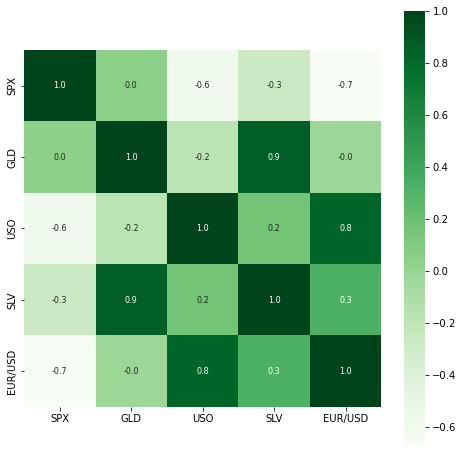

In [11]:
# heatmap for understanding the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True, annot_kws={'size':8},cmap='Greens')

In [12]:
# to show correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\rs952\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

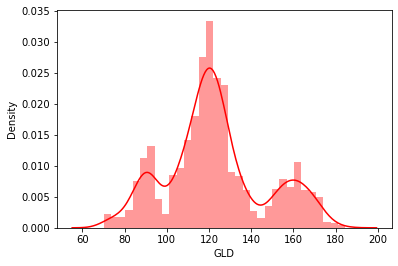

In [13]:
# checking the distribution of GLD Price 
sns.distplot(gold_price_data['GLD'],color='red')

    Splitting the Features and Targets 
    
    The Feature are
    SPX, USO, SLV, EUR/USD
    
    Target are
    GLD

In [14]:
X = gold_price_data.drop(['Date','GLD'],axis = 1)
Y = gold_price_data['GLD']

In [15]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [16]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


## Spliting Training and Test Data

In [17]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2,random_state=2)

## Model Training

### RandomForest Regressor

In [18]:
regressor = RandomForestRegressor(n_estimators=100)

In [19]:
#Training The Model
regressor.fit(Xtrain,Ytrain)

RandomForestRegressor()

## Model Evaluation

In [20]:
# Prediction on test data
test_prediction = regressor.predict(Xtest)

In [21]:
print(test_prediction)

[168.55749939  82.12409987 116.19970037 127.64920093 120.57860142
 154.89539759 150.5019979  126.28890016 117.429199   125.99370088
 116.62650106 171.93560078 141.89079822 167.90439889 115.24340002
 117.5446006  140.88300279 170.33380077 159.27990363 158.18929918
 155.25150033 125.45150026 176.13209907 157.00900393 125.13820044
  93.90949961  77.64519999 120.45600007 119.14899926 167.55029981
  88.13710047 125.20409994  91.19530113 117.54099993 121.20329913
 136.41130131 115.46280127 115.49210066 147.0872002  107.30600104
 104.03380261  87.22529818 126.38950034 118.13209988 152.45899874
 119.64279995 108.41579984 108.45629829  92.96219999 127.24719726
  75.29290041 113.73959909 121.46130031 111.31519945 118.93009913
 120.91829936 159.61469951 168.3220015  147.19679747  85.88859887
  94.6426004   86.82099899  90.66089993 119.12240058 126.46930038
 127.43330022 169.63519958 122.3533993  117.35259879  98.40610024
 168.76910129 143.47419805 132.18510224 121.18800209 120.9287993
 119.707100

In [22]:
# R squared error for actual value
e_score = metrics.r2_score(Ytest, test_prediction)
print("R squared Error :", e_score)

R squared Error : 0.9886010818927969


### Comparing Actual and Predicted Values Through Plot

In [23]:
Ytest = list(Ytest)

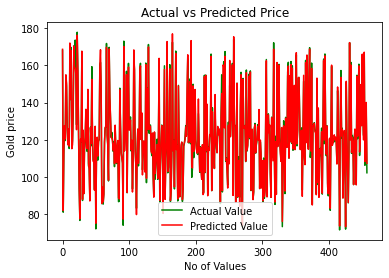

In [24]:
plt.plot(Ytest, color='green', label='Actual Value')
plt.plot(test_prediction, color= 'red', label = 'Predicted Value')
plt.title('Actual vs Predicted Price')
plt.xlabel('No of Values')
plt.ylabel('Gold price')
plt.legend()
plt.show()